# Example: Coin from a Box

This notebook demonstrates Bayesian inference for selecting a coin from a box based on observing a tail.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

## Define Prior Distribution

Define the possible theta values (coin bias parameters) and their prior probabilities.

In [32]:
theta = np.array([0, 0.25, 0.5, 0.75, 1])
pri = np.array([0.1, 0.1, 0.6, 0.1, 0.1])

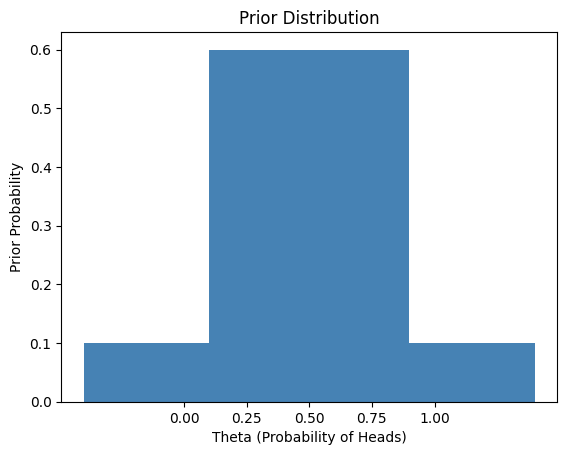

In [33]:
plt.bar(theta, pri, color='steelblue')
plt.xticks(theta)
plt.xlabel('Theta (Probability of Heads)')
plt.ylabel('Prior Probability')
plt.title('Prior Distribution')
plt.show()

## Visualize Prior Distribution

Plot the prior distribution to see our initial beliefs about the coin biases before observing any data.

## Calculate Likelihood

Calculate the likelihood of observing tails (1-theta) for each coin.

In [34]:
lik = 1 - theta

## Compute Posterior Distribution

Calculate the unnormalized posterior by multiplying prior and likelihood, then normalize by dividing by the sum.

In [35]:
unpost = pri * lik
post = unpost / np.sum(unpost)

## Summary Table

Display all values (theta, prior, likelihood, and posterior) in a table format for easy comparison.

## Visualize Posterior Distribution

Create a bar plot showing the posterior distribution across different theta values.

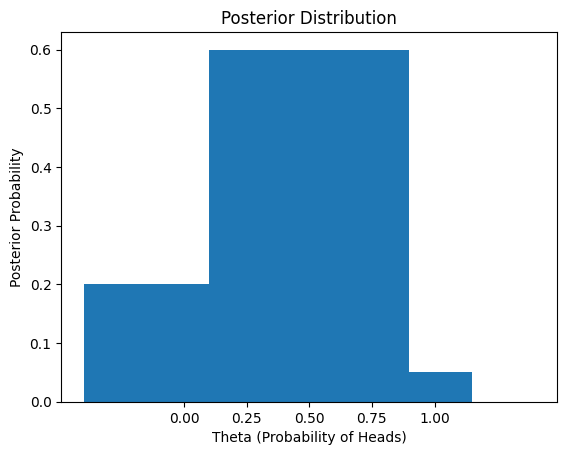

In [36]:
plt.bar(theta, post)
plt.xticks(theta)
plt.xlabel('Theta (Probability of Heads)')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distribution')
plt.show()

## Calculate Posterior Probabilities

Compute the posterior probability of heads and tails by taking weighted sums using the posterior distribution.

In [37]:
postheads = np.sum(post * theta)
posttails = np.sum(post * (1 - theta))

print(f"Posterior probability of heads: {postheads:.4f}")
print(f"Posterior probability of tails: {posttails:.4f}")

Posterior probability of heads: 0.3750
Posterior probability of tails: 0.6250


In [38]:
import pandas as pd

# Create a DataFrame with theta values as columns
df = pd.DataFrame({
    '0.00': [pri[0], lik[0], unpost[0], post[0]],
    '0.25': [pri[1], lik[1], unpost[1], post[1]],
    '0.50': [pri[2], lik[2], unpost[2], post[2]],
    '0.75': [pri[3], lik[3], unpost[3], post[3]],
    '1.00': [pri[4], lik[4], unpost[4], post[4]]
}, index=['Prior', 'Likelihood', 'Unnormalized Posterior', 'Posterior'])

df.columns.name = 'Theta'
print(df.to_string())

Theta                   0.00   0.25  0.50   0.75  1.00
Prior                    0.1  0.100   0.6  0.100   0.1
Likelihood               1.0  0.750   0.5  0.250   0.0
Unnormalized Posterior   0.1  0.075   0.3  0.025   0.0
Posterior                0.2  0.150   0.6  0.050   0.0


## Experiment 2: Observing a Head

Now let's see what happens if we observe a **head** instead of a tail. How does this change our posterior distribution?


### Comparison: Posterior Distributions for Head vs Tail

In [ ]:
# Likelihood of observing a head (theta itself)
lik_head = theta

# Compute posterior for observing a head
unpost_head = pri * lik_head
post_head = unpost_head / np.sum(unpost_head)

In [28]:
# Posterior probabilities for next flip after observing a head
postheads_afterhead = np.sum(post_head * theta)
posttails_afterhead = np.sum(post_head * (1 - theta))

print(f"After observing HEAD:")
print(f"Posterior probability of heads on next flip: {postheads_afterhead:.4f}")
print(f"Posterior probability of tails on next flip: {posttails_afterhead:.4f}")

After observing HEAD:
Posterior probability of heads on next flip: 0.6250
Posterior probability of tails on next flip: 0.3750


In [29]:
# Create a DataFrame for the head observation
df_head = pd.DataFrame({
    '0.00': [pri[0], lik_head[0], unpost_head[0], post_head[0]],
    '0.25': [pri[1], lik_head[1], unpost_head[1], post_head[1]],
    '0.50': [pri[2], lik_head[2], unpost_head[2], post_head[2]],
    '0.75': [pri[3], lik_head[3], unpost_head[3], post_head[3]],
    '1.00': [pri[4], lik_head[4], unpost_head[4], post_head[4]]
}, index=['Prior', 'Likelihood', 'Unnormalized Posterior', 'Posterior'])

df_head.columns.name = 'Theta'
print(df_head.to_string())

Theta                   0.00   0.25  0.50   0.75  1.00
Prior                    0.1  0.100   0.6  0.100   0.1
Likelihood               0.0  0.250   0.5  0.750   1.0
Unnormalized Posterior   0.0  0.025   0.3  0.075   0.1
Posterior                0.0  0.050   0.6  0.150   0.2


### Summary Table for Observing a Head

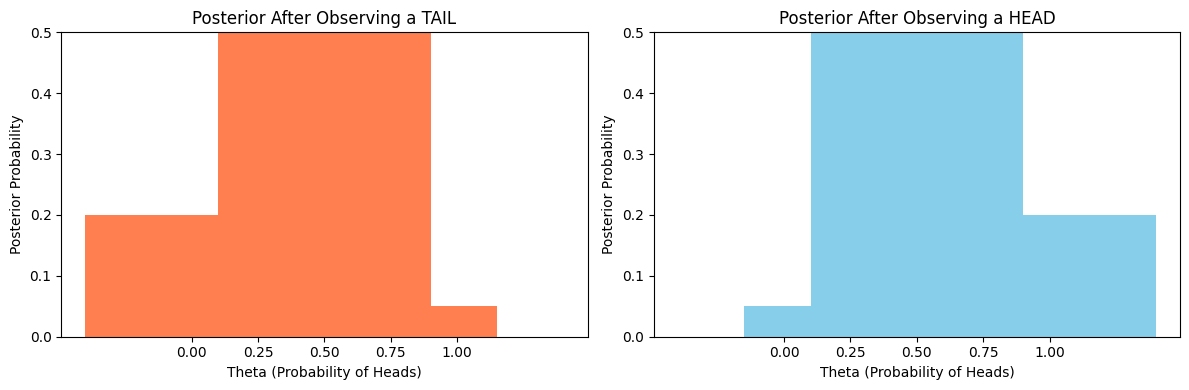

In [30]:
# Plot both posteriors for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Posterior after observing a tail
axes[0].bar(theta, post, color='coral')
axes[0].set_xticks(theta)
axes[0].set_xlabel('Theta (Probability of Heads)')
axes[0].set_ylabel('Posterior Probability')
axes[0].set_title('Posterior After Observing a TAIL')
axes[0].set_ylim(0, 0.5)

# Posterior after observing a head
axes[1].bar(theta, post_head, color='skyblue')
axes[1].set_xticks(theta)
axes[1].set_xlabel('Theta (Probability of Heads)')
axes[1].set_ylabel('Posterior Probability')
axes[1].set_title('Posterior After Observing a HEAD')
axes[1].set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

This demonstrates the symmetry of Bayesian inference: observing a head shifts probability toward higher-theta coins, while observing a tail shifts it toward lower-theta coins. 

##  Bayesian Inference



This notebook demonstrates the core principle of **Bayesian inference**: updating our beliefs based on observed data.

**The Scenario:**
- We have a box containing 5 coins with different biases (probabilities of landing heads): 0, 0.25, 0.5, 0.75, and 1.0
- We randomly select one coin but don't know which one
- We flip it once and observe a **tail**
- Question: Which coin did we likely pick?

**The Bayesian Process:**

1. **Prior Distribution**: Our initial beliefs before seeing any data
   - We believed the fair coin (θ=0.5) was most likely, with 60% probability
   - The other coins each had only 10% probability

2. **Likelihood**: How probable is our observation (tail) for each coin?
   - For a coin with θ=0, getting tails has probability 1.0 (always tails)
   - For a coin with θ=1, getting tails has probability 0.0 (never tails)
   - The likelihood is simply (1-θ)

3. **Posterior Distribution**: Updated beliefs after seeing the tail
   - Using Bayes' theorem: Posterior ∝ Prior × Likelihood
   - The posterior shows increased probability for coins with lower θ values
   - Coins more likely to produce tails become more probable

**Key Insight:**
The single observation of a tail shifted our beliefs away from the fair coin toward coins with lower head probabilities. However, because our prior strongly favored the fair coin, it still maintains significant posterior probability. This demonstrates how Bayesian inference **balances prior knowledge with new evidence**.